
Tutorial 8 SVM for classification

Consider the Iris dataset which provides measurements of sepal length, sepal width, petal length, and petal width for 50 flowers from each of 3 species. Total rows are 150.




1. Create Binary Class SVM model
    
>1.Reading input from csv file (iris.csv)

>2.Do Feature Engineering

>3.Create a new column in the dataframe (v_nv), that distinguishes the species - 'versicolor'(marked by 0) from rest.

>4.Build Model

>5.Visualize Model using mlxtend

2. Create Multi Class SVM model
    
>1.Reading input from csv file (iris.csv)
    
>2.Do Feature Engineering
    
>3.Encode the species column with numerical values. And replace label 'setosa' with '0', 'versicolor' with '1' and 'virginica' with '2'.
    
>4.Build Multiclass Model using SVM
    
>5.Visualize Model using mlxtend

>Binary Class SVM model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv("iris.csv")
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris_data.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [4]:
iris_data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [5]:
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris_data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
v_nv_fn = lambda x: 0 if x == "versicolor" else 1
iris_data["v_nv"] = iris_data['Species'].apply(v_nv_fn)

In [8]:
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [9]:
iris_data["v_nv"].unique()


array([1, 0])

In [10]:
import seaborn as sns

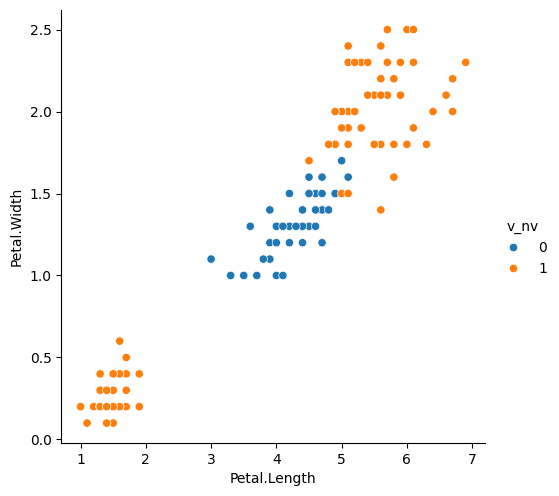

In [11]:
sns.pairplot(iris_data, x_vars="Petal.Length",
             y_vars="Petal.Width", hue="v_nv", height=5)

In [12]:
from sklearn.svm import SVC
x = iris_data[["Petal.Length", "Petal.Width"]]
y = iris_data["v_nv"]
model = SVC()
model.fit(x, y)
model.score(x, y)

0.9533333333333334

d:\ML Practical\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Binary class SVM')

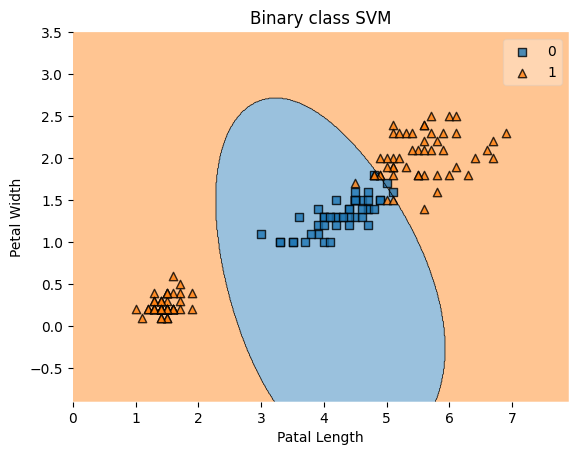

In [13]:
from mlxtend.plotting import plot_decision_regions
features = np.array(x)
targets = np.array(y)

plot_decision_regions(features, targets, clf=model)
plt.xlabel("Patal Length")
plt.ylabel("Petal Width")
plt.title("Binary class SVM")

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
iris_data["Species"] = label.fit_transform(iris_data["Species"])

In [15]:
iris_data['Species'].unique()

array([0, 1, 2])

>Multi Class SVM model

In [16]:
from sklearn.svm import SVC

x = iris_data[["Petal.Length", "Petal.Width"]]

y = iris_data["Species"]

model = SVC()

model.fit(x, y)

model.score(x, y)

0.9533333333333334

d:\ML Practical\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Multiclass classification using the SVM')

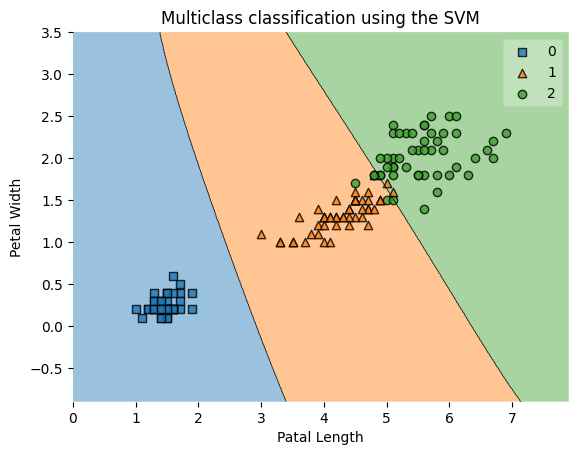

In [17]:
#visulize the data
from mlxtend.plotting import plot_decision_regions
features = np.array(x)
targets = np.array(y)

plot_decision_regions(features, targets, clf=model)
plt.xlabel("Patal Length")

plt.ylabel("Petal Width")

plt.title("Multiclass classification using the SVM")